In [2]:
import pandas as pd
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns
from collections import Counter
from datetime import datetime

combined_data = pd.read_csv('dataset/combined_dataset.csv')
file_path = r'dataset/combined_dataset.csv'
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

font_path = r'C:\Windows\Fonts\malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font_name)

In [3]:
combined_data

,user_nickname,userIdNo,comments,visible,replyLevel,regTime,parentCommentNo,sympathyCount,antipathyCount,replyAllCount,source_folder
0,kang****,2uUqJ,김상욱 의원님 화이팅 입니다. 힘내세요. 국민들이 기억할 것 입니다.,True,1,2024-12-10T10:38:22+0900,845152822566584479,1270,38,21,JTBC
1,gsy7****,NaN,NaN,False,1,2024-12-10T10:38:06+0900,845152805487378484,0,0,16,JTBC
2,hyun****,4nbAN,다행이다 젊은 보수가 있다는게 \n응원합니다 그래야 보수가 살수있어요\n견제도 할수...,True,1,2024-12-10T10:38:37+0900,845152838974701852,328,10,3,JTBC
3,syki****,59jX,이래야 국회의원이라할수있지.. 객관적이고 이성적인 판단에 박수를 보냅니다,True,1,2024-12-10T10:39:28+0900,845152893114777828,219,6,3,JTBC
4,anto****,2mW3x,머털도사와 108요괴라는 만화가 있다 거기서 108요괴가 어떻게 퇴치되는지 보면 저...,True,1,2024-12-10T10:38:48+0900,845152850064441741,105,2,6,JTBC
...,...,...,...,...,...,...,...,...,...,...,...
670972,samp****,NaN,NaN,False,1,2025-04-14T11:00:19+0900,856750647712678020,0,0,0,한국경제
670973,mmjc****,dOlx,한동훈은 정말 안된다.\n배신자는 또 배신한다.\n탄핵은 한동훈이가 제공한 것이고 ...,True,1,2025-04-14T11:34:05+0900,856752823734370344,2,7,2,한국경제
670974,shro****,1WBt0,실패한 여성 대통령 박근혜 다음 성공한 나경원 여성 대통령이 나오길 응원 합니다,True,1,2025-04-14T11:11:17+0900,856751355090436220,1,6,0,한국경제
670975,kewc****,27PBD,나경원 의원님 소신있는 모습 멋있습니다. 응원합니다!,True,1,2025-04-14T20:47:42+0900,856788490484973786,0,5,2,한국경제


In [4]:
combined_data.head()

,user_nickname,userIdNo,comments,visible,replyLevel,regTime,parentCommentNo,sympathyCount,antipathyCount,replyAllCount,source_folder
0,kang****,2uUqJ,김상욱 의원님 화이팅 입니다. 힘내세요. 국민들이 기억할 것 입니다.,True,1,2024-12-10T10:38:22+0900,845152822566584479,1270,38,21,JTBC
1,gsy7****,NaN,NaN,False,1,2024-12-10T10:38:06+0900,845152805487378484,0,0,16,JTBC
2,hyun****,4nbAN,다행이다 젊은 보수가 있다는게 \n응원합니다 그래야 보수가 살수있어요\n견제도 할수...,True,1,2024-12-10T10:38:37+0900,845152838974701852,328,10,3,JTBC
3,syki****,59jX,이래야 국회의원이라할수있지.. 객관적이고 이성적인 판단에 박수를 보냅니다,True,1,2024-12-10T10:39:28+0900,845152893114777828,219,6,3,JTBC
4,anto****,2mW3x,머털도사와 108요괴라는 만화가 있다 거기서 108요괴가 어떻게 퇴치되는지 보면 저...,True,1,2024-12-10T10:38:48+0900,845152850064441741,105,2,6,JTBC


In [25]:
combined_data.tail()

,user_nickname,userIdNo,comments,visible,replyLevel,regTime,parentCommentNo,sympathyCount,antipathyCount,replyAllCount,source_folder,year,hour,weekday,year_month,comment_length
670972,samp****,NaN,NaN,False,1,2025-04-14 11:00:19,856750647712678020,0,0,0,한국경제,2025,11,Monday,2025-04,NaN
670973,mmjc****,dOlx,한동훈은 정말 안된다.\n배신자는 또 배신한다.\n탄핵은 한동훈이가 제공한 것이고 ...,True,1,2025-04-14 11:34:05,856752823734370344,2,7,2,한국경제,2025,11,Monday,2025-04,61.0
670974,shro****,1WBt0,실패한 여성 대통령 박근혜 다음 성공한 나경원 여성 대통령이 나오길 응원 합니다,True,1,2025-04-14 11:11:17,856751355090436220,1,6,0,한국경제,2025,11,Monday,2025-04,46.0
670975,kewc****,27PBD,나경원 의원님 소신있는 모습 멋있습니다. 응원합니다!,True,1,2025-04-14 20:47:42,856788490484973786,0,5,2,한국경제,2025,20,Monday,2025-04,29.0
670976,gree****,5HNLi,국무위원들 국민힘 모두 계엄 이미 알았으면 말렸고 게엄이후 잘못된 것이라 모두 판단...,True,1,2025-04-14 11:13:20,856751486321819799,0,5,1,한국경제,2025,11,Monday,2025-04,300.0


In [5]:
combined_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670977 entries, 0 to 670976
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_nickname    670977 non-null  object
 1   userIdNo         527106 non-null  object
 2   comments         527106 non-null  object
 3   visible          670977 non-null  bool  
 4   replyLevel       670977 non-null  int64 
 5   regTime          670977 non-null  object
 6   parentCommentNo  670977 non-null  int64 
 7   sympathyCount    670977 non-null  int64 
 8   antipathyCount   670977 non-null  int64 
 9   replyAllCount    670977 non-null  int64 
 10  source_folder    670977 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 51.8+ MB


In [6]:
combined_data.describe()

,replyLevel,parentCommentNo,sympathyCount,antipathyCount,replyAllCount
count,670977.0,6.709770e+05,670977.000000,670977.000000,670977.000000
mean,1.0,8.505505e+17,4.659628,1.316847,0.242965
std,0.0,3.631585e+15,75.312770,21.986137,1.949763
min,1.0,8.446244e+17,0.000000,0.000000,0.000000
25%,1.0,8.472435e+17,0.000000,0.000000,0.000000
50%,1.0,8.505614e+17,0.000000,0.000000,0.000000
75%,1.0,8.537899e+17,1.000000,1.000000,0.000000
max,1.0,8.597141e+17,10806.000000,4746.000000,233.000000


댓글이 없는 경우의 결측 데이터도 존재한다


In [7]:
combined_data['comments'].fillna("No comment")

0                    김상욱 의원님 화이팅 입니다. 힘내세요. 국민들이 기억할 것 입니다.
1                                                No comment
2         다행이다 젊은 보수가 있다는게 \n응원합니다 그래야 보수가 살수있어요\n견제도 할수...
3                  이래야 국회의원이라할수있지.. 객관적이고 이성적인 판단에 박수를 보냅니다
4         머털도사와 108요괴라는 만화가 있다 거기서 108요괴가 어떻게 퇴치되는지 보면 저...
                                ...                        
670972                                           No comment
670973    한동훈은 정말 안된다.\n배신자는 또 배신한다.\n탄핵은 한동훈이가 제공한 것이고 ...
670974       실패한 여성 대통령 박근혜  다음  성공한 나경원 여성 대통령이 나오길 응원 합니다
670975                        나경원 의원님 소신있는 모습 멋있습니다. 응원합니다!
670976    국무위원들 국민힘 모두 계엄 이미 알았으면 말렸고 게엄이후 잘못된 것이라 모두 판단...
Name: comments, Length: 670977, dtype: object

In [8]:
combined_data[combined_data['visible'] == False][['userIdNo', 'comments']].isnull().sum()

userIdNo    143871
comments    143871
dtype: int64

수집한 데이터들 중 총 댓글수는 다음과 같았다.

In [9]:
# 1. 전체 visible 비율 확인
visible_data = combined_data['visible'].value_counts()

# 2. 전체 댓글 중 visible 비율 계산
total = visible_data.sum()
true_ratio = visible_data[True] / total * 100
false_ratio = visible_data[False] / total * 100

print(f"댓글이 보여지는 비율: {true_ratio:.2f}%")
print(f"댓글이 보여지지 않는 비율: {false_ratio:.2f}%")

댓글이 보여지는 비율: 78.56%
댓글이 보여지지 않는 비율: 21.44%


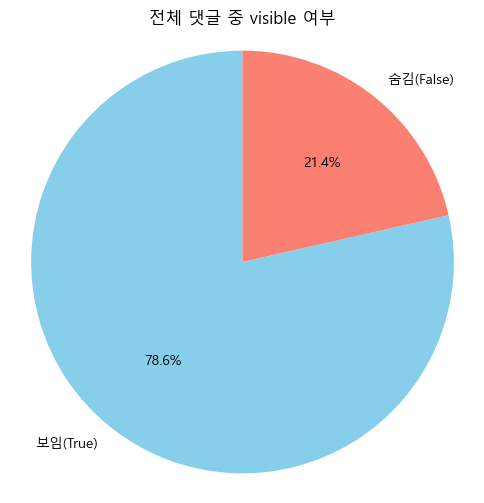

In [10]:
# 3. 전체 비율 파이차트로 시각화
plt.figure(figsize=(6, 6))
plt.pie(visible_data, 
        labels=['보임(True)', '숨김(False)'], 
        autopct='%1.1f%%',
        colors=['skyblue', 'salmon'],
        startangle=90)
plt.title("전체 댓글 중 visible 여부")
plt.axis('equal')
plt.show()

댓글이 보이지 않은 경우는 클린 봇에 의해 걸러져서 안보이는 것이라고 예상된다.
그렇다면 각 언론사별 비율은 어떨까?

In [11]:
# 4. 언론사(source_folder)별 visible 분포 계산
news = combined_data.groupby(['source_folder', 'visible']).size().unstack(fill_value=0)
news_ratio = news.div(news.sum(axis=1), axis=0)

print(news_ratio.head())  # 비율 확인

visible           False     True 
source_folder                    
JTBC           0.190925  0.809075
KBS            0.213548  0.786452
MBC            0.186751  0.813249
MBN            0.213636  0.786364
SBS            0.216211  0.783789


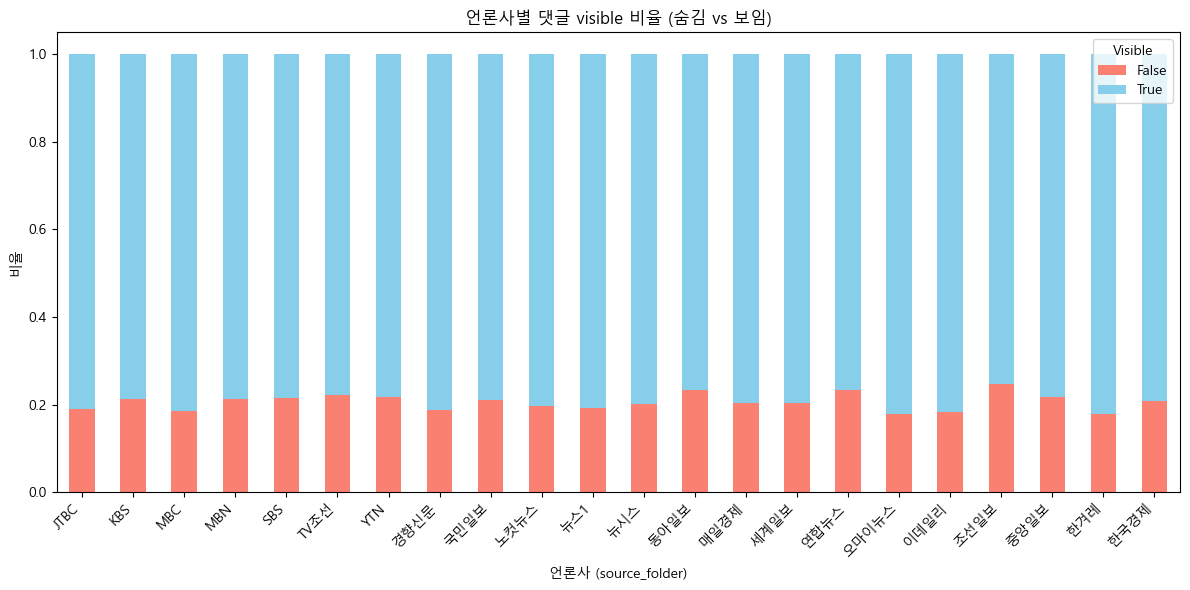

In [12]:
# 5. 언론사별 비율 stacked bar로 시각화
news_ratio.plot(kind='bar', stacked=True, figsize=(12, 6), color=['salmon', 'skyblue'])

plt.title('언론사별 댓글 visible 비율 (숨김 vs 보임)')
plt.ylabel('비율')
plt.xlabel('언론사 (source_folder)')
plt.legend(title='Visible')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

대부분 비슷한 비율로 보인다. 대부분 비슷한 비율로 보이지만 진보 성향의 언론사들이 
활발한 댓글 활동(커뮤니티 활동?)으로 클린봇에 감지되어 안보여지는 댓글들이 많았다.

사람들이 댓글을 주로 작성한 시간은 언제일까?

In [16]:
# 댓글 작성시간 추출
combined_data['regTime'] =  pd.to_datetime(combined_data['regTime'])
combined_data['year'] = combined_data['regTime'].dt.year
combined_data['hour'] = combined_data['regTime'].dt.hour
combined_data['weekday'] = combined_data['regTime'].dt.day_name()

# regTime에서 timezone 정보 제거
combined_data['regTime'] = combined_data['regTime'].dt.tz_localize(None)
combined_data['year_month'] = combined_data['regTime'].dt.to_period('M').astype(str)

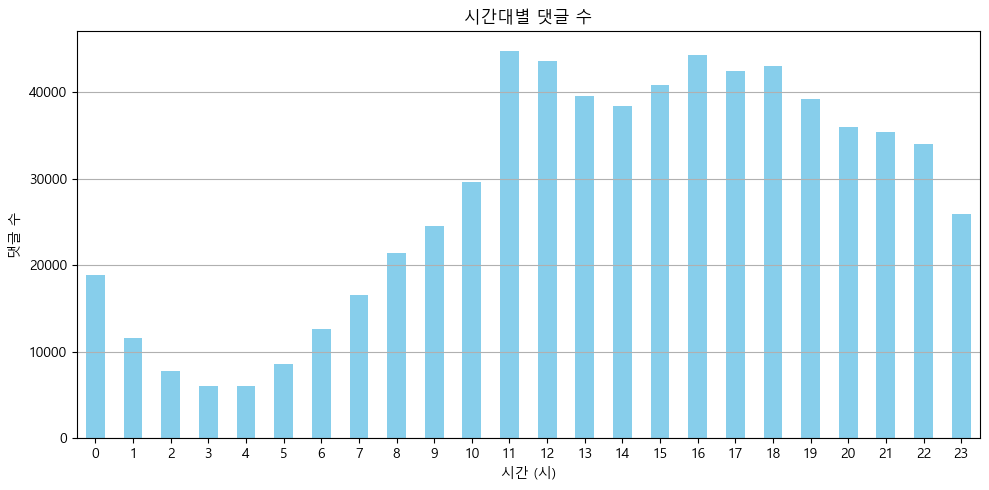

In [17]:
# 시간대별 댓글 수 시각화 예시
hour_counts = combined_data['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
hour_counts.plot(kind='bar', color='skyblue')
plt.title("시간대별 댓글 수")
plt.xlabel("시간 (시)")
plt.ylabel("댓글 수")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

아침시간 보다는 점심~저녁 시간에 활발한 댓글 작성이 이루어져 있었다.
크롤링하면서 각 댓글들의 공감수와 비공감수 정보또한 존재하여 시각화를 했다.

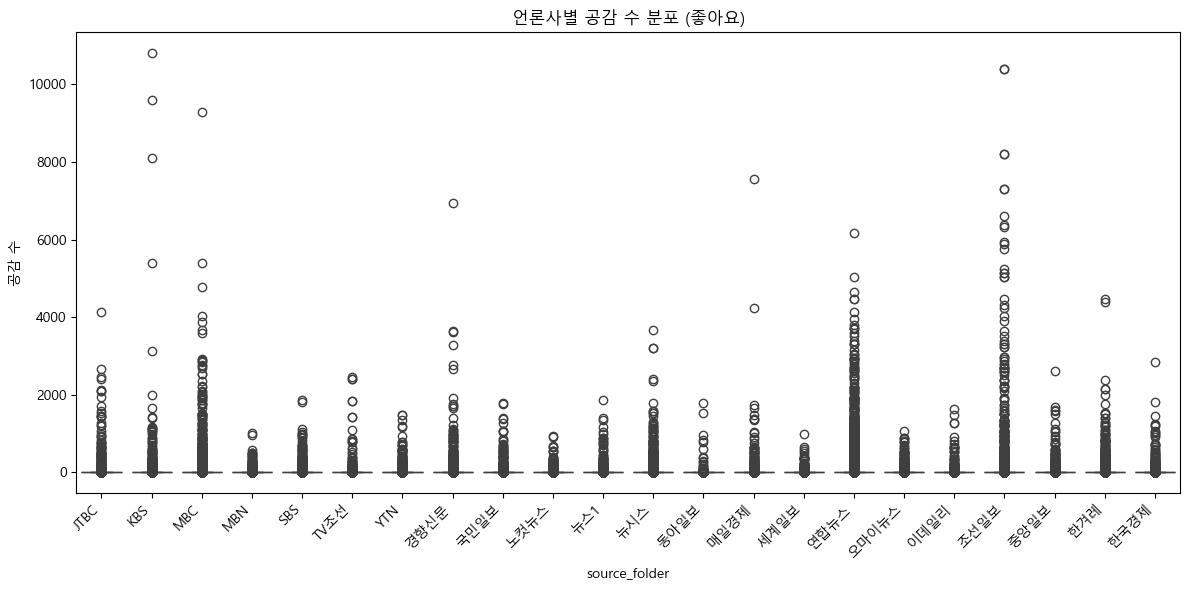

In [18]:
# 언론사별 공감수(좋아요) 분포
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='source_folder', y='sympathyCount')

plt.title("언론사별 공감 수 분포 (좋아요)")
plt.xticks(rotation=45, ha='right')
plt.ylabel("공감 수")
plt.tight_layout()
plt.show()

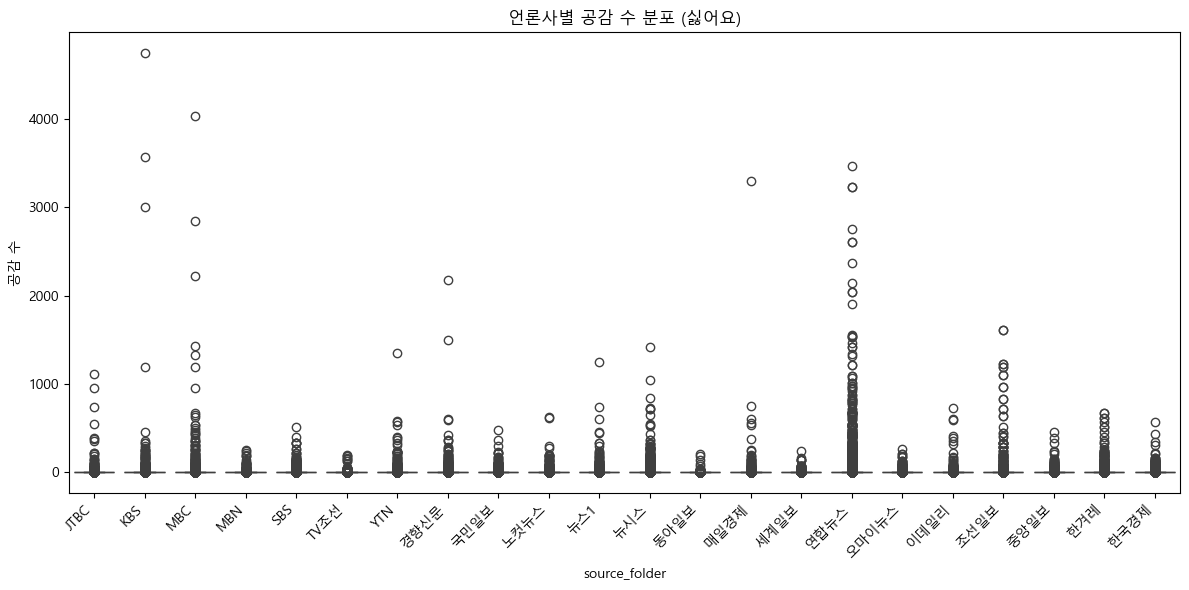

In [19]:
# 언론사별 공감수(싫어요) 분포
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='source_folder', y='antipathyCount')

plt.title("언론사별 공감 수 분포 (싫어요)")
plt.xticks(rotation=45, ha='right')
plt.ylabel("공감 수")
plt.tight_layout()
plt.show()

그러나 세부적인 댓글 내용들이 무엇인지도 모르고 단순히 공감수만 나와있어서 의미있는 결론을 도출하기는 어렵다고 판단

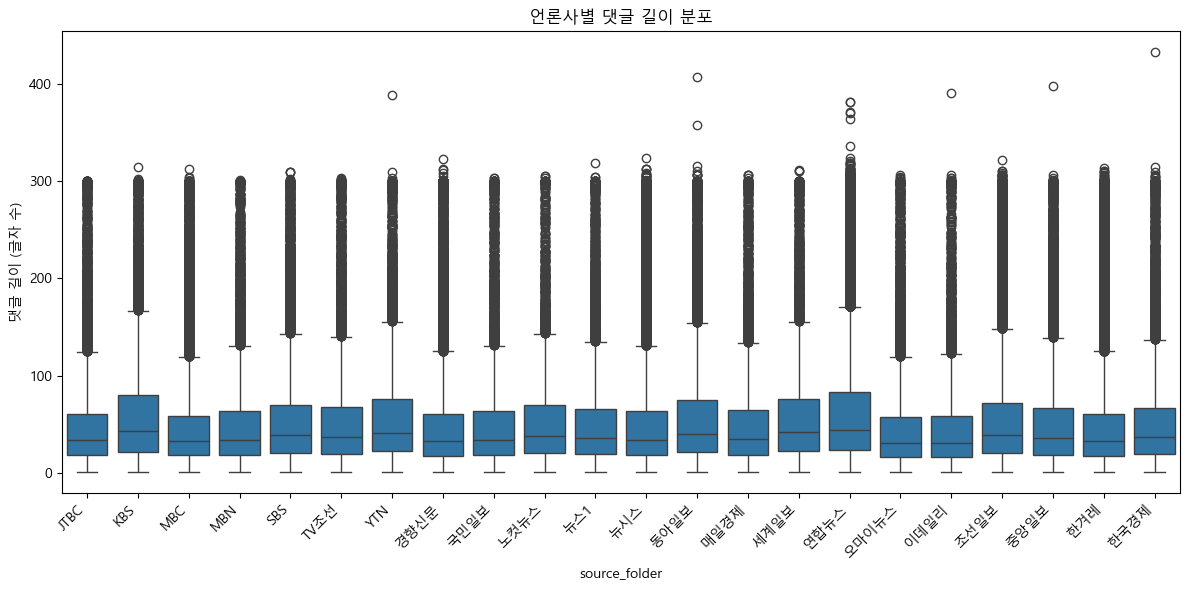

In [20]:
# 댓글 길이 컬럼 추가
combined_data['comment_length'] = combined_data['comments'].dropna().apply(len)

# 댓글 길이 Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='source_folder', y='comment_length')

plt.title("언론사별 댓글 길이 분포")
plt.xticks(rotation=45, ha='right')
plt.ylabel("댓글 길이 (글자 수)")
plt.tight_layout()
plt.show()

다음은 konlp를 이용해 댓글들 중에서 어떤 키워드 들이 가장 많이 나왔을지 분석해본 것이다.

📅 2024-12 댓글 수: 1045230개


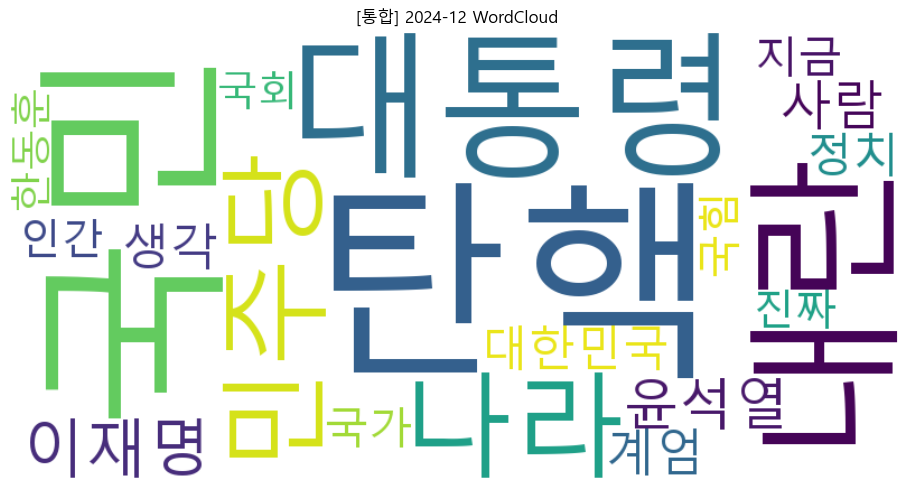

📅 2025-01 댓글 수: 878633개


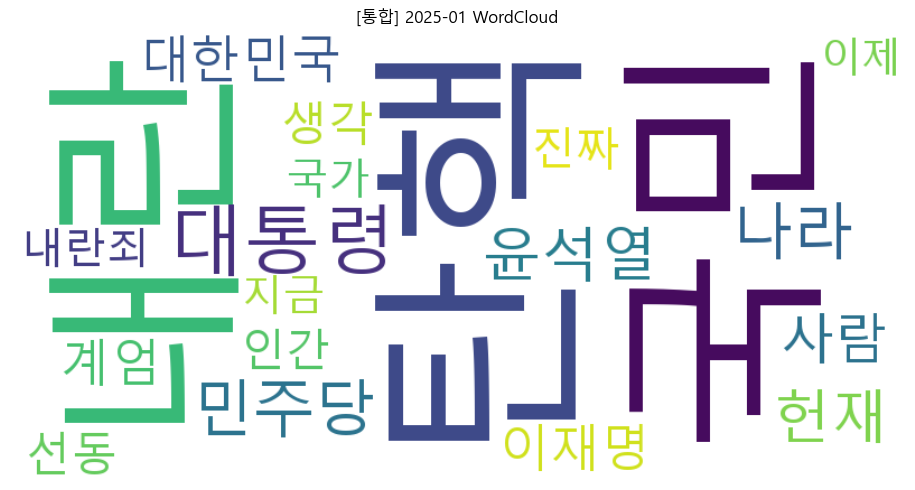

📅 2025-02 댓글 수: 946569개


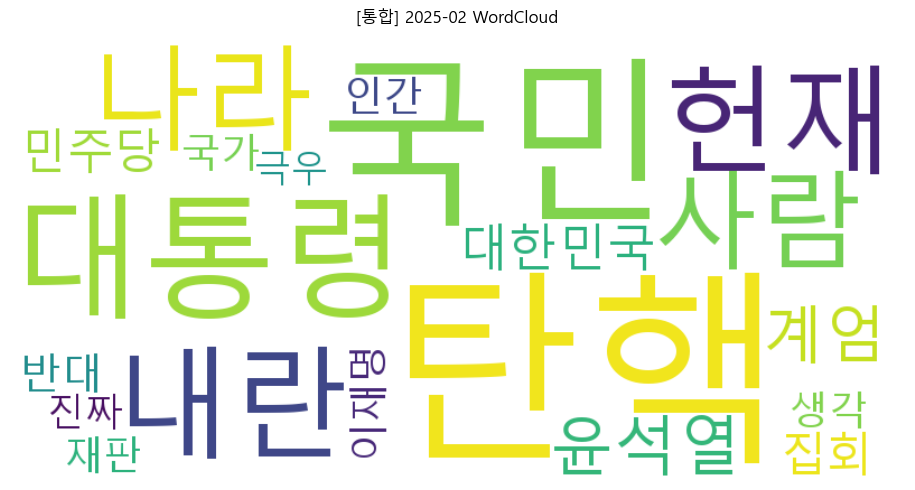

📅 2025-03 댓글 수: 967550개


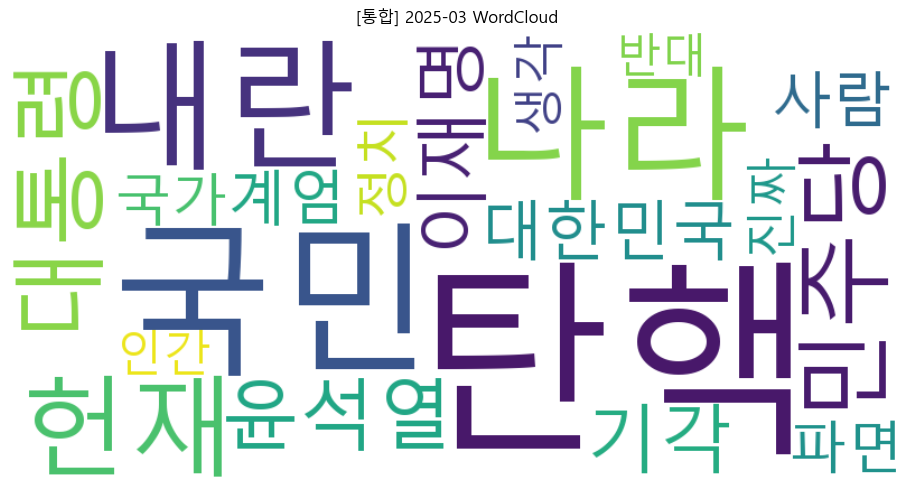

📅 2025-04 댓글 수: 422022개


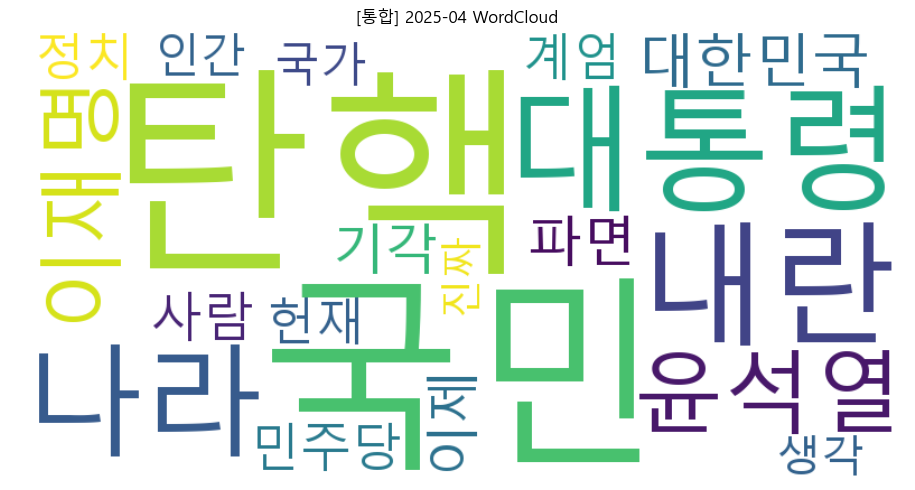

In [28]:
# === 불용어 & 형태소 분석기 ===
stopwords = set([
    '그리고', '그러나', '하지만', '또한', '있다', '없다', '이다', '이', '가', '은', '는', '을', '를', '에', '의', '도', '로',
    '과', '와', '한', '하다', '것', '수', '들', '좀', '잘', '너무', '더', '만', '까지', '처럼', '에서', '부터', '되다'
])
okt = Okt()

def clean_text(text):
    nouns = okt.nouns(text)
    return [word for word in nouns if word not in stopwords and len(word) > 1]

def draw_wordcloud_from_list(words, title, top_n=20):
    word_counts = Counter(words)
    most_common_words = dict(word_counts.most_common(top_n))

    wordcloud = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=400
    ).generate_from_frequencies(most_common_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# === 실행 ===
df = pd.read_csv(file_path)
df['regTime'] = pd.to_datetime(df['regTime'], errors='coerce')

# ✅ 타임존 제거 (tz-aware → tz-naive)
df['regTime'] = df['regTime'].dt.tz_localize(None)

# ✅ 날짜 필터링 (2025년 4월 30일까지만 포함)
cutoff = pd.to_datetime('2025-04-30')
df = df[df['regTime'] <= cutoff]

if 'comments' not in df.columns or 'regTime' not in df.columns:
    print("❌ 'comments' 또는 'regTime' 열이 없습니다.")
else:
    df = df.dropna(subset=['comments', 'regTime'])
    df['regTime'] = pd.to_datetime(df['regTime'], errors='coerce')
    df = df.dropna(subset=['regTime'])

    # ✅ 2025년 4월 30일까지만 포함
    cutoff = pd.to_datetime('2025-04-30')
    df = df[df['regTime'] <= cutoff]

    df['year_month'] = df['regTime'].dt.to_period('M').astype(str)

    monthly_comments = df.groupby('year_month')['comments'].apply(lambda x: ' '.join(x.astype(str)))

    for month, all_comments in monthly_comments.items():
        words = []
        for comment in all_comments.split('\n'):  # 여러 줄일 경우 대비
            words.extend(clean_text(comment))

        print(f"📅 {month} 댓글 수: {len(words)}개")
        draw_wordcloud_from_list(words, f"[통합] {month} WordCloud", top_n=20)

In [24]:
def visualize_monthly_wordcloud_from_csv(file_path, top_n=20):
    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print(f"❌ CSV 읽기 실패: {e}")
        return

    if 'comments' not in df.columns or 'regTime' not in df.columns:
        print("❌ 'comments' 또는 'regTime' 열이 없습니다.")
        return

    df = df.dropna(subset=['comments', 'regTime'])
    df['regTime'] = pd.to_datetime(df['regTime'], errors='coerce')
    df = df.dropna(subset=['regTime'])

    df['year_month'] = df['regTime'].dt.to_period('M').astype(str)

    monthly_comments = df.groupby('year_month')['comments'].apply(lambda x: ' '.join(x.astype(str)))

    for month, all_comments in monthly_comments.items():
        words = []
        for comment in all_comments.split('\n'):
            words.extend(clean_text(comment))

        print(f"📅 {month} 댓글 수: {len(words)}개")
        draw_wordcloud_from_list(words, f"[통합] {month} WordCloud", top_n=top_n)